In [1]:
'''
AI Assisted GL Mapping
Code Author: Lakshya J
Data set used: "AI_POC - Updated-14May.xlsx"
Main purpose of this project is to visualize the given dataset and apply few Machine Learning libraries
to see which one fits the best for the given set of input data
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
#Converting the excel file into a pandas dataframe
training_data = pd.read_excel('AI_POC - Updated-14May.xlsx', sheet_name=0, dtype='str')
test_data = pd.read_excel('AI_POC - Updated-14May.xlsx', sheet_name=1, dtype='str')
check_data=pd.read_excel('AI_POC - Updated-14May.xlsx', sheet_name=2, dtype='str')

training_data_ = pd.read_excel('DAT_Pilot_AI_SET02.xlsx', sheet_name=0, dtype='str')

drop_list=['Taxonomy_Id','Coa_Master_Id','tenant_id','Template_Id','Grouping_Id', 'GL_Nature.1','Level1_Grouping_Id','Level_2_Grouping_Id', 'Gl_Account_Id']
drop_list_=['Taxonomy_Id','Coa_Master_Id','tenant_id','Template_Id','Grouping_Id', 'Gl_Account_Id','Level1_Grouping_Id','Level_2_Grouping_Id']
attr=["Description", "Account_Group", "GL_Nature","Level1_Grouping_Id_desc", "Level_2_Grouping_Id_desc", "Reverse_Flag"]
attr_test=["Description", "Account_Group","Account_Group_Nature"]
attr_check=['Description','Level1_Grouping_Id_desc','Level_2_Grouping_Id_desc','GL_Nature','reverse flag','Grouping_Id_desc']
drop_list_check=['GL Account', 'Grouping_Id', 'Taxonomy']

training_data=training_data.drop(drop_list, axis=1)
training_data_=training_data_.drop(drop_list_, axis=1)
check_data=check_data.drop(drop_list_check, axis=1)

training_data=pd.concat([training_data, training_data_])

In [3]:
###Visualisation of data

#Replacing all the missing values with other values
def replace_null(df, col_name,a):
    #Converting all the values of column description as a string object type
    df[col_name]=df[col_name].astype('str')
    df[col_name].fillna(value=a, inplace = True)

#Some manual adjustments to be made on the given form of data
check_data=check_data.replace('TRUE','1')
check_data=check_data.replace("FALSE",'0')

for wrd in attr:
    replace_null(training_data, wrd, "null")
for wrd in attr_test:
    replace_null(test_data,wrd,"null")
for wrd in attr_check:
    replace_null(check_data, wrd, "null")
    
replace_null(training_data,"Grouping_Id_desc", "null")

In [4]:
#Descriptive Statistics
training_data.describe()

,Description,Account_Group,GL_Nature,Grouping_Id_desc,Reverse_Flag,Level1_Grouping_Id_desc,Level_2_Grouping_Id_desc
count,73845,73845,73845,73845,73845,73845,73845
unique,6074,754,4,481,2,102,43
top,Bank Charges,Trade receivables - other,Asset,"Trade receivables, current, unsecured, conside...",0,Cash and cash equivalents,"Financial Assets, current"
freq,96,9054,39277,11034,57427,10604,21460


In [5]:
test_data.describe()

,Gl_Account_Id,Description,Account_Group,Account_Group_Nature
count,734,734,734,734
unique,734,708,99,5
top,55250000,CGST RCM Receivable,nan,Asset
freq,1,5,163,237


In [6]:
check_data.describe()

,Description,Grouping_Id_desc,Level1_Grouping_Id_desc,Level_2_Grouping_Id_desc,GL_Nature,reverse flag
count,567,567,567,567,567,567
unique,544,119,43,26,4,2
top,SGST RCM Receivable,Balances with government authorities,Other current assets,Current assets,Asset,False
freq,5,98,103,120,237,393


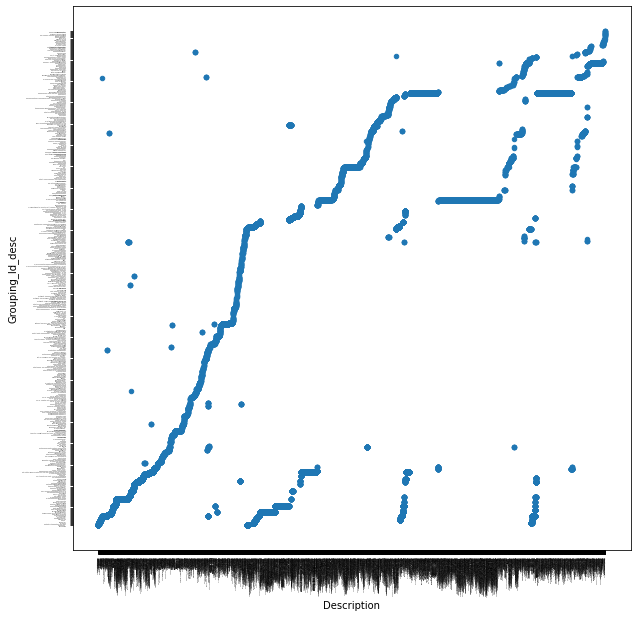

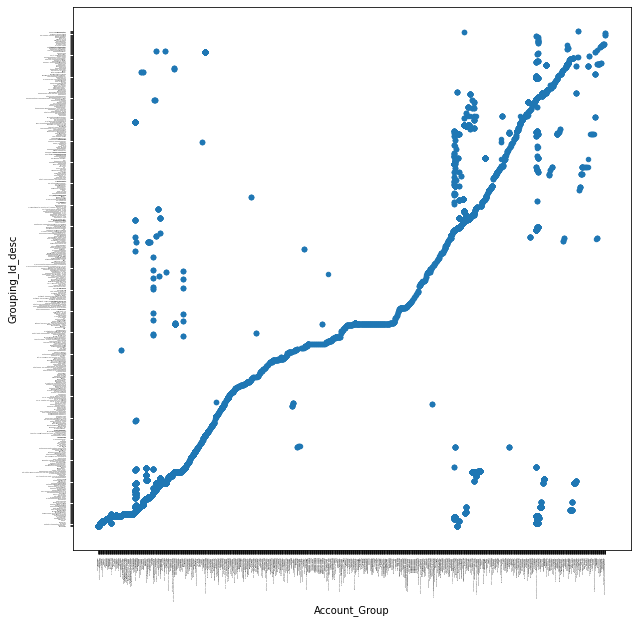

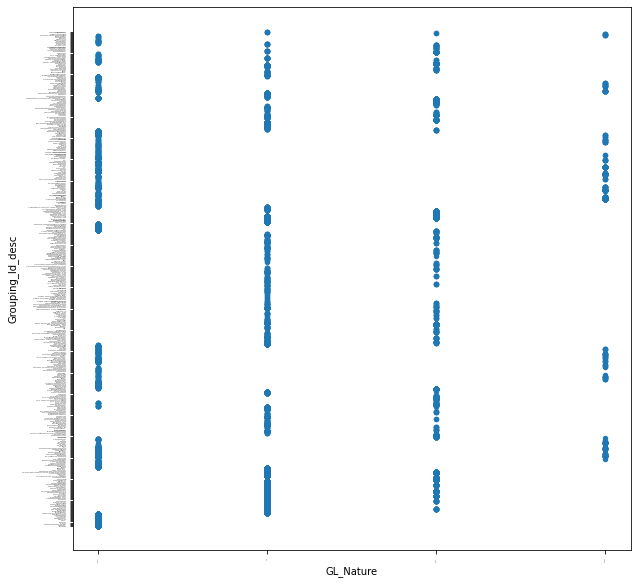

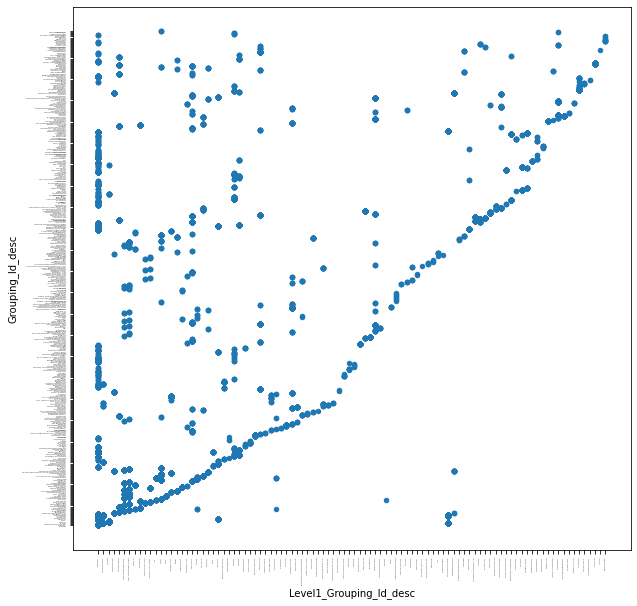

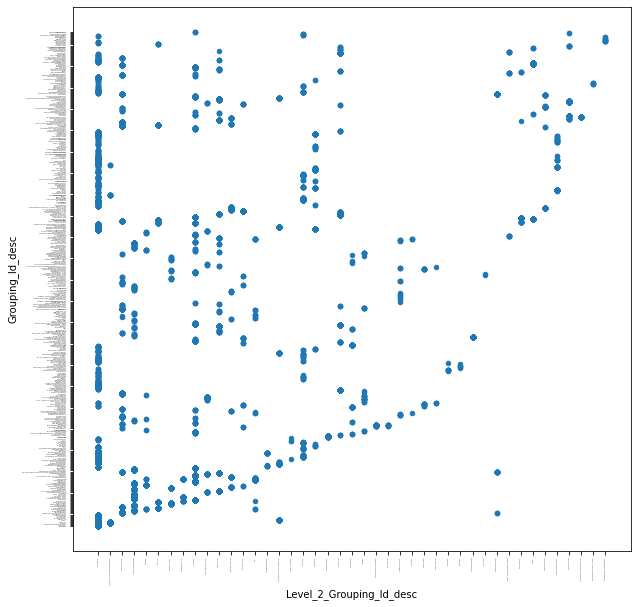

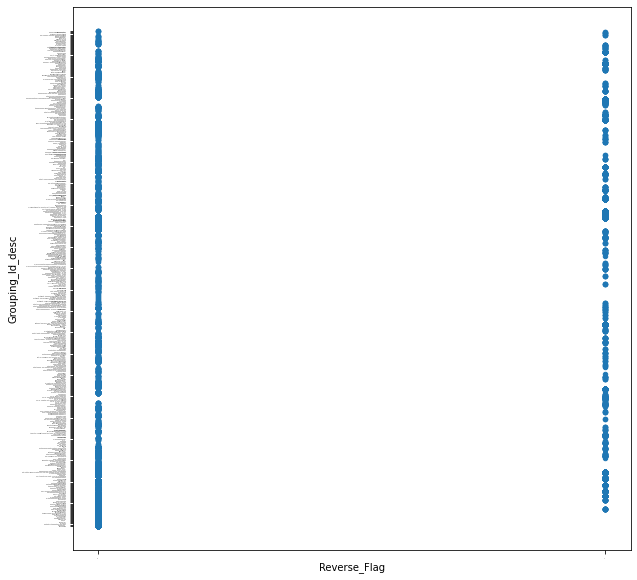

In [7]:
#Inferential Statistics

def scatter_plot(str1):
    training_data.plot.scatter(str1, "Grouping_Id_desc", fontsize=1, figsize=(10,10), rot=90)
    warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")

for wrd in attr:
    scatter_plot(wrd)

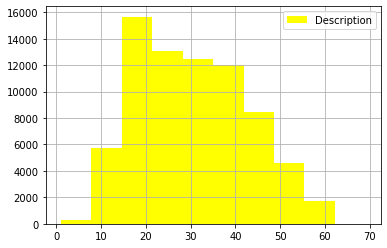

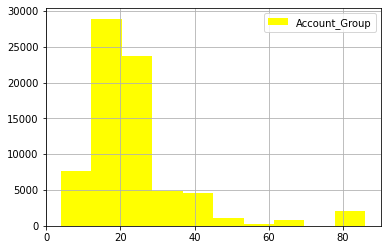

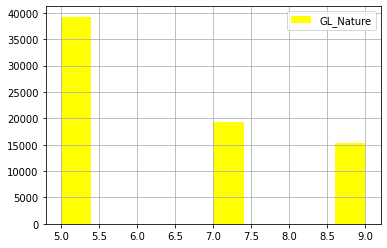

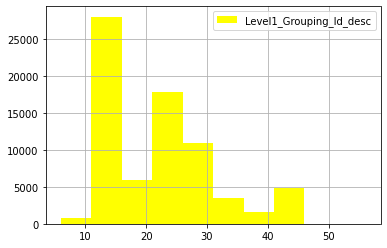

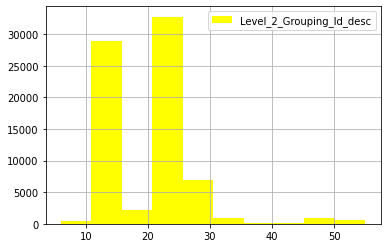

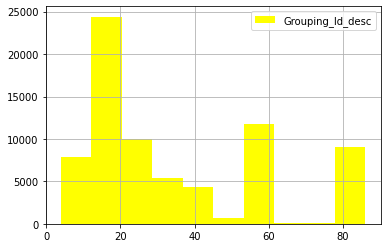

In [7]:
#Exploring fundamental characteristics of the textual data

test_data=test_data.drop(["Gl_Account_Id"], axis=1)
#These plots show the number of characters in the data for each of the following data entries.
def length_hist(attr_name):
    training_data[attr_name].str.len().hist(label=attr_name, color='yellow')
    plt.legend()
    plt.show()

for att in attr[:-1]:
    length_hist(att)
length_hist("Grouping_Id_desc")

### <font color="yellow">This gives an idea of the average length of all the entries, including the space characters.</font>

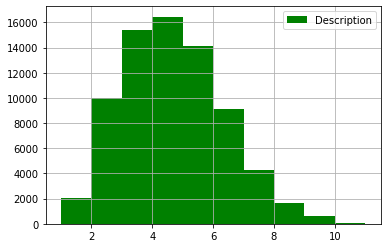

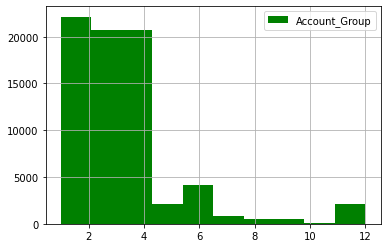

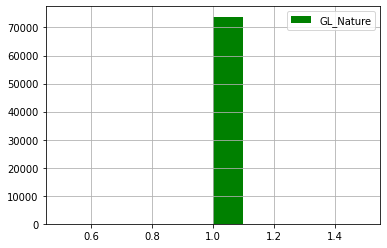

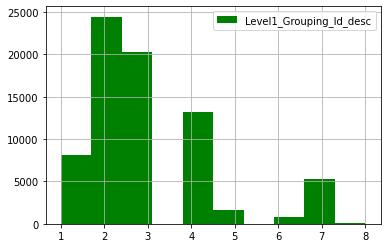

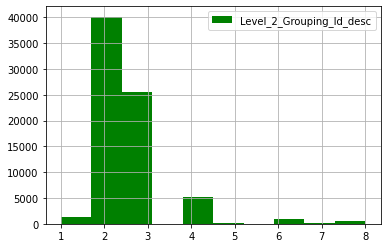

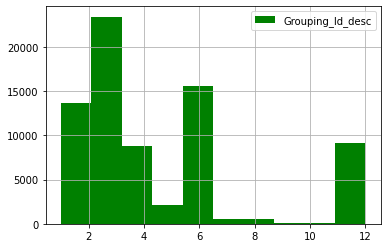

In [8]:
#Histograms showing the number of words in each of the attributes

def word_count_hist(attr_name):
    training_data[attr_name].str.split().map(lambda x: len(x)).hist(label=attr_name,color='green')
    plt.legend()
    plt.show()
    
for att in attr[:-1]:
    word_count_hist(att)
word_count_hist("Grouping_Id_desc")

### <font color = "green"> Gives an idea regarding the number of words in each attribute. Nothing much useful can be learned from this information" </font>

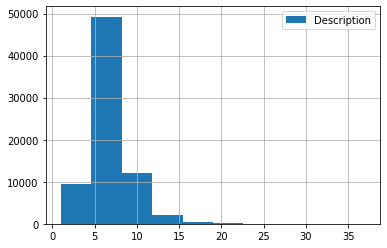

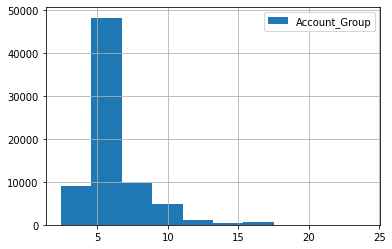

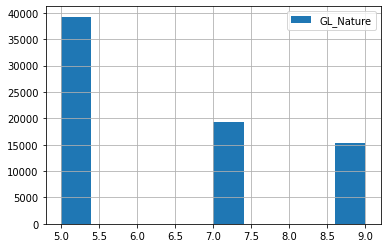

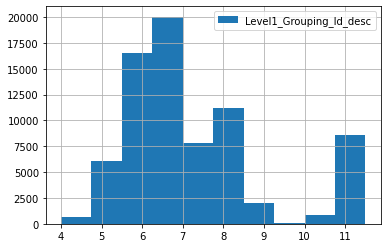

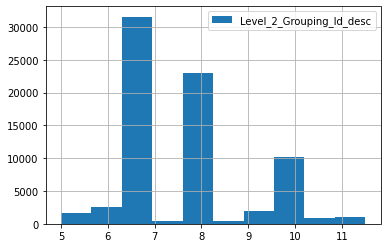

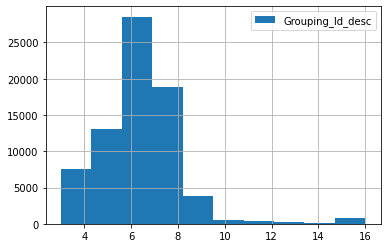

In [9]:
#Histograms showing the average length of each word in each column of the dataframe

def average_word_len(attr_name):
    training_data[attr_name].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(label=attr_name)
    plt.legend()
    plt.show()

for att in attr[:-1]:
    average_word_len(att)
average_word_len("Grouping_Id_desc")

### <font color = "blue"> The average length of each word in each attribute. For all the attributes the peak is around 5. </font>

<BarContainer object of 8 artists>

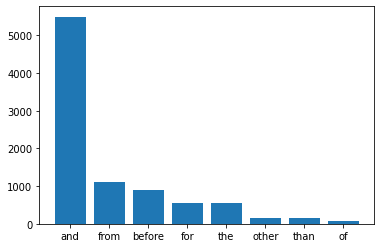

In [4]:
#Plotting the top stopwords and the count of the top stopwords
from collections import defaultdict
stop=set(nltk.corpus.stopwords.words('english'))

corpus=[]
for att in attr[:-1]:
    new= training_data[att].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
plt.bar(x,y)

### <font color = "black"> This gives an idea of the most recurring words in the entire corpus. Hence I have used these word as my stopwords and have removed them. All other words are unique, since I was searching for the top 10 and found only 8 such commonly occuring words. </font>

In [5]:
###Pre-processing of the raw data

#Cleanup of data
def cleanup_data(df, attribute_name):
    df[attribute_name]=df[attribute_name].str.lower()
    df[attribute_name].replace('[^A-Za-z ]+', '', regex=True, inplace=True)
    small_words=top
    df[attribute_name].replace((word for word in small_words),'',regex=True ,inplace=True)
    df[attribute_name].replace('chg',' charge ',regex=True ,inplace=True)
    df[attribute_name].replace(' loans',' loan ',regex=True ,inplace=True)
    df[attribute_name].replace(' travellg',' travelling ',regex=True ,inplace=True)
    df[attribute_name].replace('  ', ' ', regex=True, inplace=True)
    
#Function call for cleaning up of data
for wrd in attr:
    if wrd!="Reverse_Flag":
        cleanup_data(training_data, wrd)
for wrd in attr_test:
    cleanup_data(test_data,wrd)
for wrd in attr_check:
    cleanup_data(check_data,wrd)

#Cleaning up the output column
cleanup_data(training_data, "Grouping_Id_desc")


In [6]:
#Lemmatization of the text data
wordnet_lemmatizer =nltk.stem.WordNetLemmatizer()
from textblob import TextBlob 

def word_lemma(text):
    words=nltk.tokenize.word_tokenize(text)
    words=[wordnet_lemmatizer.lemmatize(w) for w in words if len(w)>2]
    words=sorted(words)
    words=" ".join(w for w in words)
    #words=str(TextBlob(words).correct())
        
    return words

def word_lemma_desc(text):
    words=nltk.tokenize.word_tokenize(text)
    words=[wordnet_lemmatizer.lemmatize(w) for w in words if len(w)>2]
    words =" ".join(w for w in words)
    #words=str(TextBlob(words).correct())
    return words

for att in attr[:-1]:
    training_data[att]=training_data[att].apply(word_lemma)
for att in attr_test:
    test_data[att]=test_data[att].apply(word_lemma)
for att in attr_check[:-1]:
    check_data[att]=check_data[att].apply(word_lemma)    
    
training_data["Grouping_Id_desc"]=training_data["Grouping_Id_desc"].apply(word_lemma_desc)
check_data["Grouping_Id_desc"]=check_data["Grouping_Id_desc"].apply(word_lemma_desc)

In [7]:
#Splitting the data points into various columns on the dataframe

#Training Data
x_Description=training_data["Description"].str.split(" ", expand=True)
x_Description.fillna(value="null", inplace=True)
x_Account_Group=training_data["Account_Group"].str.split(" ", expand=True)
x_Account_Group.fillna(value="null", inplace=True)
x_GL_Nature=training_data["GL_Nature"].str.split(" ", expand=True)
x_GL_Nature.fillna(value="null", inplace=True)
training_data_y=training_data["Grouping_Id_desc"]

#Input Test data to apply predictions
x_Description_test=test_data["Description"].str.split(" ", expand=True)
x_Description_test.fillna(value="null", inplace=True)
x_Account_Group_test=test_data["Account_Group"].str.split(" ", expand=True)
x_Account_Group_test.fillna(value="null", inplace=True)
x_GL_Nature_test=test_data["Account_Group_Nature"].str.split(" ", expand=True)
x_GL_Nature_test.fillna(value="null", inplace=True)

#Check data to apply the predictions and compare outputs
x_Description_check=check_data["Description"].str.split(" ", expand=True)
x_Description_check.fillna(value="null", inplace=True)
x_Account_Group_check=check_data["Level1_Grouping_Id_desc"].str.split(" ", expand=True)
x_Account_Group_check.fillna(value="null", inplace=True)
x_GL_Nature_check=check_data["GL_Nature"].str.split(" ", expand=True)
x_GL_Nature_check.fillna(value="null", inplace=True)
check_data_y=check_data["Grouping_Id_desc"]
check_data_y=pd.DataFrame({'Description':check_data_y[:]})

In [8]:
#Appending all the columns to the dataframe
training_data_x=pd.concat([x_Description,x_Account_Group,x_GL_Nature], axis=1)
training_data_x=training_data_x.astype('str')
training_null=pd.DataFrame({'column':["null"]*len(training_data_x)})

test_data_x=pd.concat([x_Description_test,x_Account_Group_test,x_GL_Nature_test], axis=1)
test_data_x=test_data_x.astype('str')
test_null=pd.DataFrame({'column':["null"]*len(test_data_x)})

check_data_x=pd.concat([x_Description_check,x_Account_Group_check,x_GL_Nature_check], axis=1)
check_data_x=check_data_x.astype('str')
check_null=pd.DataFrame({'column':["null"]*len(check_data_x)})

max_columns=max(len(training_data_x.columns), len(test_data_x.columns), len(check_data_x.columns))
a=len(training_data_x.columns)
b=len(test_data_x.columns)
c=len(check_data_x.columns)

for i in range(max_columns-b):
    test_data_x.insert(len(test_data_x.columns), "column",test_null, True)

for i in range(max_columns-a):
    training_data_x.insert(len(training_data_x.columns), "column",training_null,True)

for i in range(max_columns-c):
    check_data_x.insert(len(check_data_x.columns), "column",test_null, True)

training_data_x.columns=np.arange(len(training_data_x.columns))
test_data_x.columns=np.arange(len(test_data_x.columns))
check_data_x.columns=np.arange(len(check_data_x.columns))

In [9]:
#Conversion of string values to floats using one label-encoder technique
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x=training_data_x.apply(encoder.fit_transform)
x_test_final=test_data_x.apply(encoder.fit_transform)
x_check_final=check_data_x.apply(encoder.fit_transform)

In [10]:
###Applying the Random Forest Classifier - Machine Learning Model

#Applying train-test split
x_train, x_test, y_train, y_test = train_test_split(x,training_data_y, test_size=0.15, random_state=42)
#Applying train-validation split
x_train, x_valid, y_train, y_valid=train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [11]:
def mean_absolute_error(y_act, y_pred):
    y=np.where((y_act==y_pred),1,0)
    res=np.sum(y)
    res=res/len(y)
    return res

In [12]:
def test_valid(X, y, X_valid, y_valid, n_estimators=200,max_features='auto', min_samples_leaf=1):
    rf = RandomForestClassifier(n_estimators=n_estimators,
                               n_jobs=-1,
                               oob_score=True,
                               max_features=max_features, 
                               min_samples_leaf=min_samples_leaf)
    rf.fit(X, y)
    y_pred = rf.predict(X_valid)
    mae_valid = mean_absolute_error(y_valid, y_pred)
    #print(y_valid[:15])
    #print(y_pred[:15])
    r2_score_valid = rf.score(X_valid, y_valid)
    print(f"OOB R^2 {rf.oob_score_:.5f}")
    print(f"Validation R^2 {r2_score_valid:.5f}, MAE {mae_valid:.5f}")
    return rf, r2_score_valid, mae_valid

In [31]:
ntrees = 500
minleaf = 1
for maxf in np.arange(7,15,1):
    print(f"n_estimators={ntrees}, max_features={maxf:.1f}, min_samples_leaf={minleaf}")
    test_valid(x_train, y_train, x_valid, y_valid,
               max_features=maxf, min_samples_leaf=minleaf)

n_estimators=500, max_features=7.0, min_samples_leaf=1
OOB R^2 0.98415
Validation R^2 0.98279, MAE 0.98279
n_estimators=500, max_features=8.0, min_samples_leaf=1
OOB R^2 0.98443
Validation R^2 0.98279, MAE 0.98279
n_estimators=500, max_features=9.0, min_samples_leaf=1
OOB R^2 0.98445
Validation R^2 0.98311, MAE 0.98311
n_estimators=500, max_features=10.0, min_samples_leaf=1
OOB R^2 0.98447
Validation R^2 0.98303, MAE 0.98303
n_estimators=500, max_features=11.0, min_samples_leaf=1
OOB R^2 0.98437
Validation R^2 0.98303, MAE 0.98303
n_estimators=500, max_features=12.0, min_samples_leaf=1
OOB R^2 0.98433
Validation R^2 0.98295, MAE 0.98295
n_estimators=500, max_features=13.0, min_samples_leaf=1
OOB R^2 0.98423
Validation R^2 0.98311, MAE 0.98311
n_estimators=500, max_features=14.0, min_samples_leaf=1
OOB R^2 0.98437
Validation R^2 0.98295, MAE 0.98295


In [20]:
max_features=9
for minl in np.arange(1,7,1):
    print(f"n_estimators={ntrees}, max_features={max_features:.1f}, min_samples_leaf={minl}")
    test_valid(x_train, y_train, x_valid, y_valid,
               max_features=max_features, min_samples_leaf=minl)

n_estimators=500, max_features=0.5, min_samples_leaf=1
8909                                             cash hand
2667                                        workinprogress
29296    total outstanding due creditor other than micr...
15591                                        finished good
24873                                      prepaid expense
8579                                     balance with bank
30066    trade receivables current unsecured considered...
31693    trade receivables current unsecured considered...
37716                            plant and equipment owned
13981    total outstanding due creditor other than micr...
21936                                         bank deposit
6150                            project consultancy charge
32564    trade receivables current unsecured considered...
202                     loan from related partiesunsecured
14347    total outstanding due creditor other than micr...
Name: Grouping_Id_desc, dtype: object
['cash hand' 'workinpr

In [21]:
#Applying the classifier with tuned hyperparameters on the split test data
test_valid(x_train,y_train,x_test,y_test,max_features=max_features,min_samples_leaf=1)

34803                                 trade payable others
8842     security deposit noncurrent unsecured consider...
16567                                     security deposit
13041                                            cash hand
6691                                    advance income tax
410                                  staff welfare expense
28283    trade receivables current unsecured considered...
4617                             travelling and conveyance
33467                contribution provident and other fund
29324    total outstanding due creditor other than micr...
968      total outstanding due creditor other than micr...
2310                                        workinprogress
10132    total outstanding due creditor other than micr...
30037                                      salary and wage
26060                  interest accrued short term deposit
Name: Grouping_Id_desc, dtype: object
['total outstanding due creditor other than micro enterprise and small enterp

(RandomForestClassifier(max_features=0.5, n_estimators=200, n_jobs=-1,
                        oob_score=True),
 0.9838403899972917,
 0.9838403899972917)

In [13]:
#Applying the classifier on the test data whose results we have to find
rf = RandomForestClassifier(n_estimators=500,n_jobs=-1,oob_score=True,max_features=0.5, min_samples_leaf=1)
rf.fit(x, training_data_y)
y_pred = rf.predict(x_test_final)
y=pd.DataFrame({'Description':y_pred[:]})

y_pred_check = rf.predict(x_check_final)
y_check=pd.DataFrame({'Description':y_pred_check[:]})

In [14]:
test_data.insert(len(test_data.columns),"Grouping_Id_desc",y,True)
test_data[40:50]

,Gl_Account_Id,Description,Account_Group,Account_Group_Nature,Grouping_Id_desc
40,12171010,bill frgn sbi usd,bill discounting facility,nan,allowance for bad and doubtful debt current
41,12171020,bill euro frgn sbi,bill discounting facility,nan,allowance for bad and doubtful debt current
42,12171030,bill discountingsbi foreign inr,bill discounting facility,nan,allowance for bad and doubtful debt current
43,12171100,bill dis inld sbi,nan,liability,allowance for bad and doubtful debt current
44,12171200,bill citi dis inld,nan,liability,allowance for bad and doubtful debt current
45,12171300,bill dis inld kotak,nan,liability,allowance for bad and doubtful debt current
46,12172000,bill citi dis frgn,nan,liability,allowance for bad and doubtful debt current
47,12175100,bill delphi discount,nan,nan,allowance for bad and doubtful debt current
48,12175200,bill discount sepl,nan,nan,allowance for bad and doubtful debt current
49,12181000,fcnr sbi,bank from loan secured term,nan,allowance for bad and doubtful debt current


In [15]:
test_data[140:150]

,Gl_Account_Id,Description,Account_Group,Account_Group_Nature,Grouping_Id_desc
140,13113357,gratuity payable,current for gratuity provision,liability,allowance for bad and doubtful debt current
141,13113358,exgratia payable,accrued and benefit salary,liability,allowance for bad and doubtful debt current
142,13113359,diff incom off round,nan,liability,allowance for bad and doubtful debt current
143,13113362,loan pyble society,accrued and benefit salary,liability,allowance for bad and doubtful debt current
144,13113363,subscription union,accrued and benefit salary,liability,allowance for bad and doubtful debt current
145,13113364,deduction misc,accrued and benefit salary,liability,allowance for bad and doubtful debt current
146,13113365,deduction other,accrued and benefit salary,liability,allowance for bad and doubtful debt current
147,13113366,death emp payabl rel,accrued and benefit salary,liability,allowance for bad and doubtful debt current
148,13113367,contribution emp np,nan,liability,allowance for bad and doubtful debt current
149,13113369,diff incom off round,accrued and benefit salary,liability,computer equipment acc depr


In [16]:
check_data_y=pd.concat([check_data_y, y_check],axis=1)

In [20]:
check_data_y[280:290]

,Description,Description
280,secured cash credit,allowance for bad and doubtful debt current
281,secured cash credit,allowance for bad and doubtful debt current
282,secured cash credit,allowance for bad and doubtful debt current
283,secured packing credit,allowance for bad and doubtful debt current
284,secured term loan from financial institution,allowance for bad and doubtful debt current
285,secured term loan from financial institution,allowance for bad and doubtful debt current
286,secured term loan from financial institution,allowance for bad and doubtful debt current
287,secured term loan from financial institution,allowance for bad and doubtful debt current
288,secured term loan from financial institution,allowance for bad and doubtful debt current
289,secured packing credit,allowance for bad and doubtful debt current
